In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
loan_data=pd.read_csv('loan_data_2007_2014(1).csv')

In [3]:
pd.set_option('display.float_format', '{:,.0f}'.format)

In [4]:
print(loan_data.columns.tolist())

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'total_rev_hi_lim']


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      65535 non-null  int64  
 1   loan_amnt               65535 non-null  int64  
 2   funded_amnt             65535 non-null  int64  
 3   funded_amnt_inv         65535 non-null  float64
 4   term                    65535 non-null  int64  
 5   int_rate                65535 non-null  float64
 6   grade                   65535 non-null  object 
 7   sub_grade               65535 non-null  object 
 8   emp_length              63373 non-null  object 
 9   home_ownership          65535 non-null  object 
 10  annual_inc              65531 non-null  float64
 11  verification_status     65535 non-null  object 
 12  issue_d                 65535 non-null  object 
 13  loan_status             65535 non-null  object 
 14  purpose                 65535 non-null

In [6]:
loan_data=loan_data.fillna(0)
loan_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,total_rev_hi_lim
0,1077501,5000,5000,"4,975",36,11,B,B2,10+ years,RENT,...,84,9,"5,861","5,832","5,000",861,0,Jan-15,172,0
1,1077430,2500,2500,"2,500",60,15,C,C4,< 1 year,RENT,...,9,4,"1,009","1,009",456,435,117,Apr-13,120,0
2,1077175,2400,2400,"2,400",36,16,C,C5,10+ years,RENT,...,98,10,"3,004","3,004","2,400",604,0,Jun-14,650,0
3,1076863,10000,10000,"10,000",36,13,C,C1,10+ years,RENT,...,21,37,"12,226","12,226","10,000","2,209",0,Jan-15,357,0
4,1075358,3000,3000,"3,000",60,13,B,B5,1 year,RENT,...,54,38,"3,242","3,242","2,233","1,009",0,Jan-16,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,8395527,15000,15000,"15,000",60,16,C,C4,7 years,MORTGAGE,...,53,14,"9,526","9,526","5,064","4,462",0,Jan-16,366,"25,500"
65531,8535422,10000,10000,"10,000",36,10,B,B1,10+ years,MORTGAGE,...,39,44,"10,919","10,919","10,000",919,0,Dec-14,"7,065","22,400"
65532,8619412,2125,2125,"2,125",36,14,C,C1,10+ years,MORTGAGE,...,67,17,"1,896","1,896","1,441",455,0,Jan-16,73,"5,700"
65533,8619523,10000,10000,"9,925",36,8,A,A4,10+ years,MORTGAGE,...,54,34,"8,134","8,073","6,980","1,154",0,Jan-16,313,"8,000"


In [7]:
loan_data['emp_length_int']=loan_data['emp_length'].str.replace('+ years','')
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace(' year','')
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.extract('(d+)')
loan_data['emp_length_int']=pd.to_numeric(loan_data['emp_length_int'])

In [8]:
loan_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,total_rev_hi_lim,emp_length_int
0,1077501,5000,5000,"4,975",36,11,B,B2,10+ years,RENT,...,9,"5,861","5,832","5,000",861,0,Jan-15,172,0,NaN
1,1077430,2500,2500,"2,500",60,15,C,C4,< 1 year,RENT,...,4,"1,009","1,009",456,435,117,Apr-13,120,0,NaN
2,1077175,2400,2400,"2,400",36,16,C,C5,10+ years,RENT,...,10,"3,004","3,004","2,400",604,0,Jun-14,650,0,NaN
3,1076863,10000,10000,"10,000",36,13,C,C1,10+ years,RENT,...,37,"12,226","12,226","10,000","2,209",0,Jan-15,357,0,NaN
4,1075358,3000,3000,"3,000",60,13,B,B5,1 year,RENT,...,38,"3,242","3,242","2,233","1,009",0,Jan-16,68,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,8395527,15000,15000,"15,000",60,16,C,C4,7 years,MORTGAGE,...,14,"9,526","9,526","5,064","4,462",0,Jan-16,366,"25,500",NaN
65531,8535422,10000,10000,"10,000",36,10,B,B1,10+ years,MORTGAGE,...,44,"10,919","10,919","10,000",919,0,Dec-14,"7,065","22,400",NaN
65532,8619412,2125,2125,"2,125",36,14,C,C1,10+ years,MORTGAGE,...,17,"1,896","1,896","1,441",455,0,Jan-16,73,"5,700",NaN
65533,8619523,10000,10000,"9,925",36,8,A,A4,10+ years,MORTGAGE,...,34,"8,134","8,073","6,980","1,154",0,Jan-16,313,"8,000",NaN


In [9]:
loan_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,"65,535",NaN,NaN,NaN,"3,682,039","4,127,712","54,734","577,866","840,484","8,977,452","10,234,817"
loan_amnt,"65,535",NaN,NaN,NaN,"12,379","7,922",500,"6,000","10,000","16,525","35,000"
funded_amnt,"65,535",NaN,NaN,NaN,"12,205","7,793",500,"6,000","10,000","16,000","35,000"
funded_amnt_inv,"65,535",NaN,NaN,NaN,"11,761","7,867",0,"5,825","10,000","15,967","35,000"
term,"65,535",NaN,NaN,NaN,42,11,36,36,36,60,60
int_rate,"65,535",NaN,NaN,NaN,13,4,5,10,13,16,26
grade,65535,7,B,19453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,65535,35,B3,4534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,65535,12,10+ years,17214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,65535,5,MORTGAGE,31254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
loan_data.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
recoveries                    0
last_pymnt_d                  0
last_pym

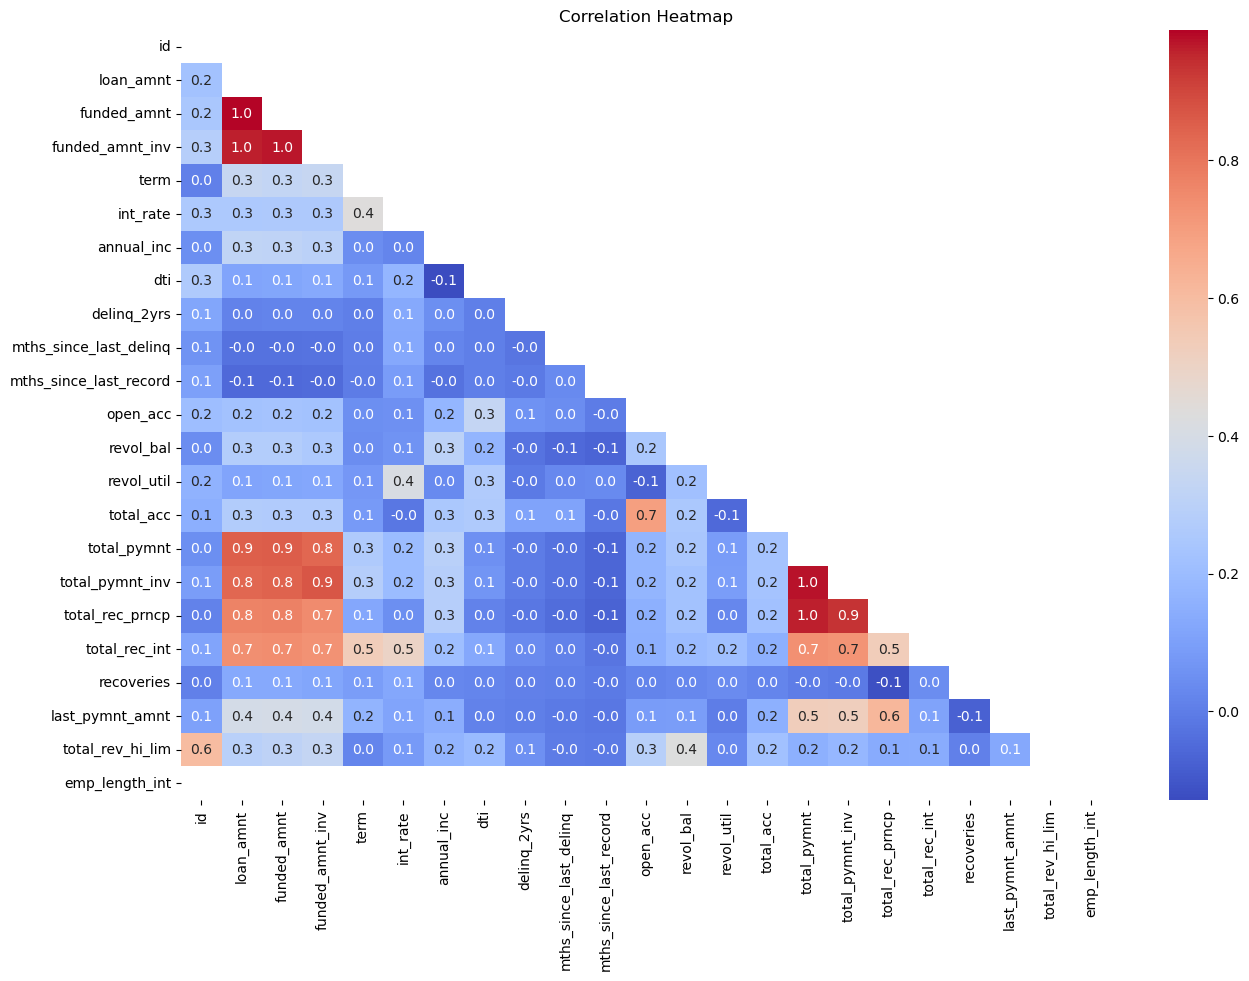

In [11]:
numeric_df = loan_data.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool),k=0)
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f',mask=mask) 
plt.title('Correlation Heatmap')
plt.show()
#as rate for all numerical variables

AttributeError: 'Legend' object has no attribute 'legendHandles'

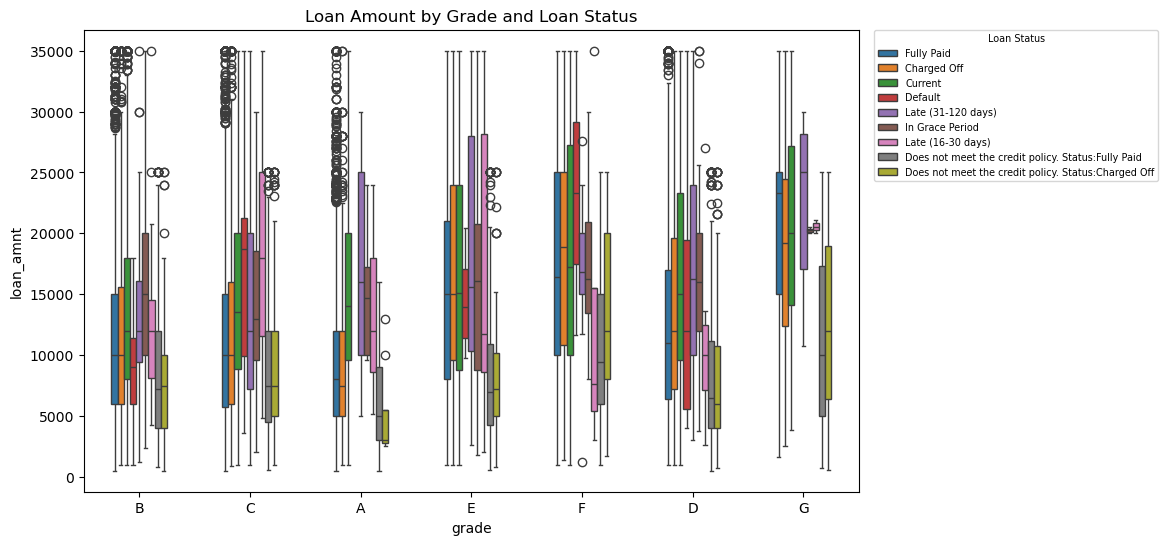

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data, x='grade', y='loan_amnt', hue='loan_status',width=0.5)
plt.title('Loan Amount by Grade and Loan Status')
legend = plt.legend(
    title='Loan Status',
    bbox_to_anchor=(1.02, 1),  
    loc='upper left',
    borderaxespad=0.,
    fontsize='x-small',          
    title_fontsize='x-small'  )
for handle in legend.legendHandles:
    handle.set_sizes([20]) if hasattr(handle, 'set_sizes') else handle.set_linewidth(1)
plt.tight_layout()
plt.show()

In [13]:
loan_data.groupby("grade")["loan_amnt"].median()

grade
A    9,000
B   10,000
C   10,075
D   12,000
E   14,000
F   16,000
G   18,850
Name: loan_amnt, dtype: float64

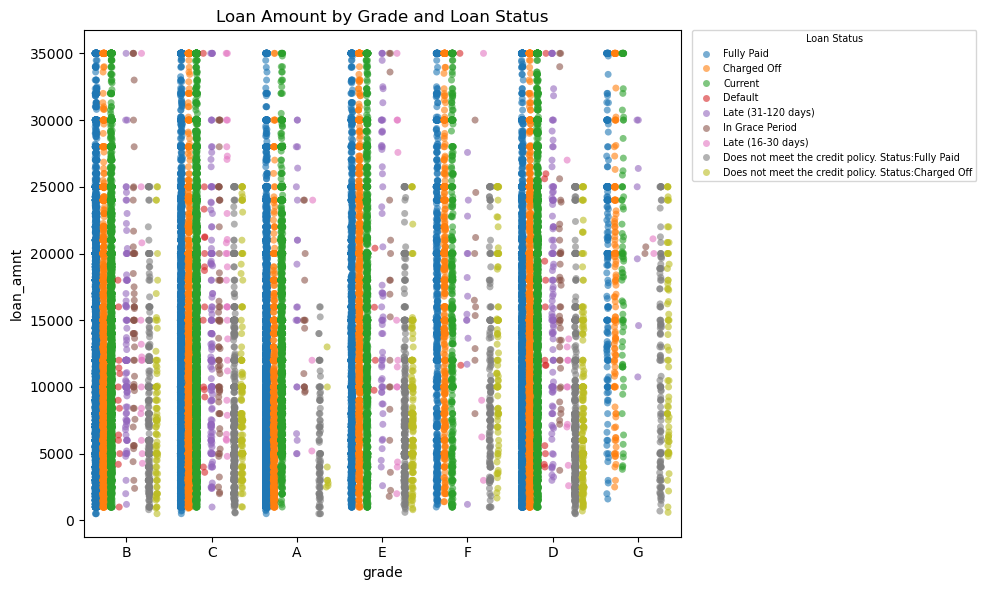

In [14]:
plt.figure(figsize=(10, 6))
strip = sns.stripplot(data=loan_data,x='grade',y='loan_amnt',hue='loan_status',jitter=True,dodge=True,alpha=0.6)

plt.title('Loan Amount by Grade and Loan Status')

handles, labels = strip.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,title='Loan Status',bbox_to_anchor=(1.02, 1),
           loc='upper left',borderaxespad=0,fontsize='x-small',title_fontsize='x-small')
plt.tight_layout()
plt.show()


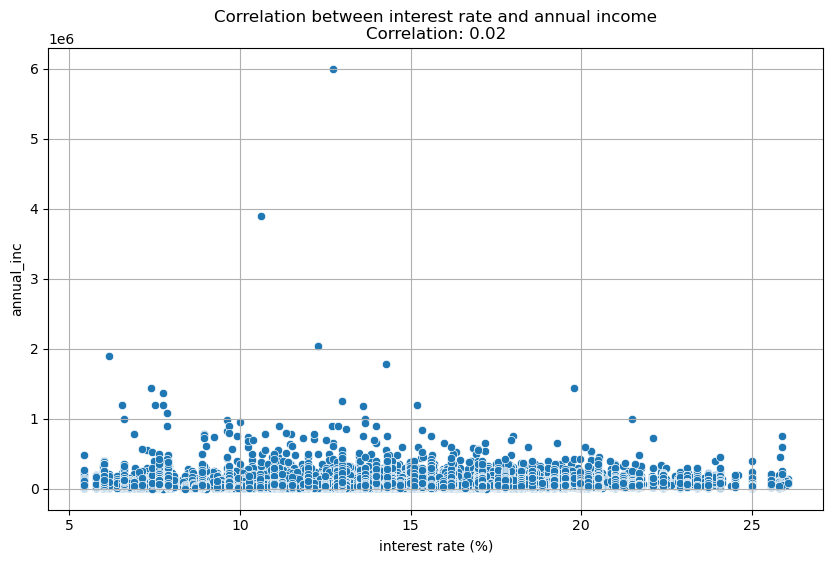

In [15]:
# Step 1: Filter out rows where either of the two columns is NaN
df_filtered = loan_data[['int_rate', 'annual_inc']].dropna()
# Step 2: Calculate the correlation between the two columns
correlation = df_filtered['int_rate'].corr(df_filtered['annual_inc'])

# Step 3: Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='int_rate', y='annual_inc')

# Add titles and labels
plt.title(f'Correlation between interest rate and annual income\nCorrelation: {correlation:.2f}')
plt.xlabel('interest rate (%)')
plt.ylabel('annual_inc')
plt.grid(True)

# Show the plot
plt.show()

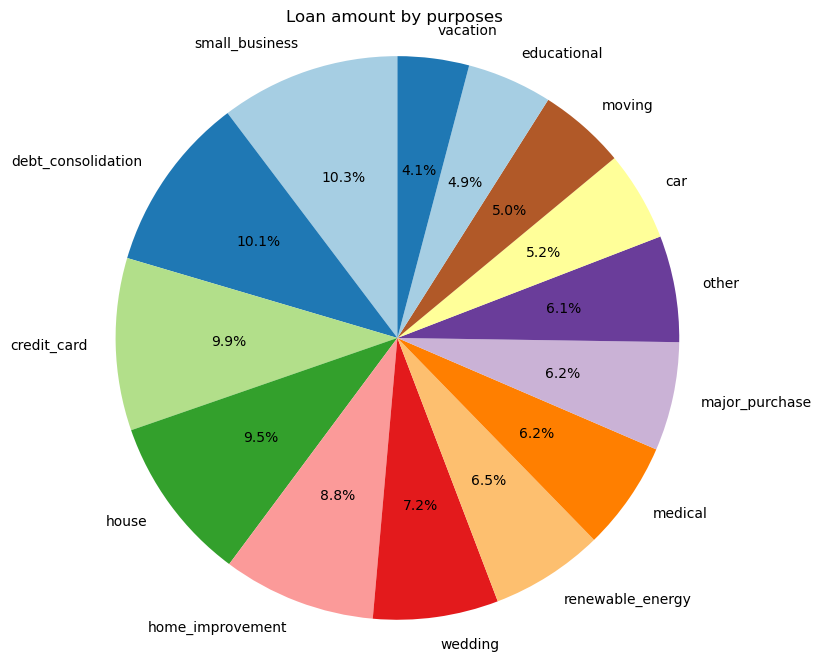

In [16]:
pur_to_loan=loan_data[['purpose','loan_amnt']].dropna()
pur_to_loan = pur_to_loan.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(pur_to_loan, labels=pur_to_loan.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Loan amount by purposes ')

plt.axis('equal') 
plt.show()

In [17]:
import numpy as np
import pandas as pd

# Get numeric correlations
numeric_df = loan_data.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Set threshold
threshold = 0.1

# Create a mask to filter only one triangle (lower or upper)
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)

# Use the mask to filter correlation values
filtered = corr.where(~mask)

# Unstack and drop NaNs and self-correlations
high_corr = filtered.unstack().dropna()
high_corr = high_corr[abs(high_corr) > threshold]

# Sort by absolute correlation value
high_corr = high_corr.reindex(high_corr.abs().sort_values(ascending=False).index)

# Show result
print(high_corr)


id                      id                1 
funded_amnt             funded_amnt       1 
term                    term              1 
int_rate                int_rate          1 
annual_inc              annual_inc        1 
                                          ..
loan_amnt               revol_util        0 
total_rec_int           last_pymnt_amnt   0 
delinq_2yrs             total_acc         0 
mths_since_last_delinq  total_acc         0 
id                      last_pymnt_amnt   0 
Length: 152, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19480\4280488995.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted_annot.iloc[i, j] = f"{corr.iloc[i, j]:.0%}"
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19480\4280488995.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted_annot.iloc[i, j] = f"{corr.iloc[i, j]:.0%}"
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19480\4280488995.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '96%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted

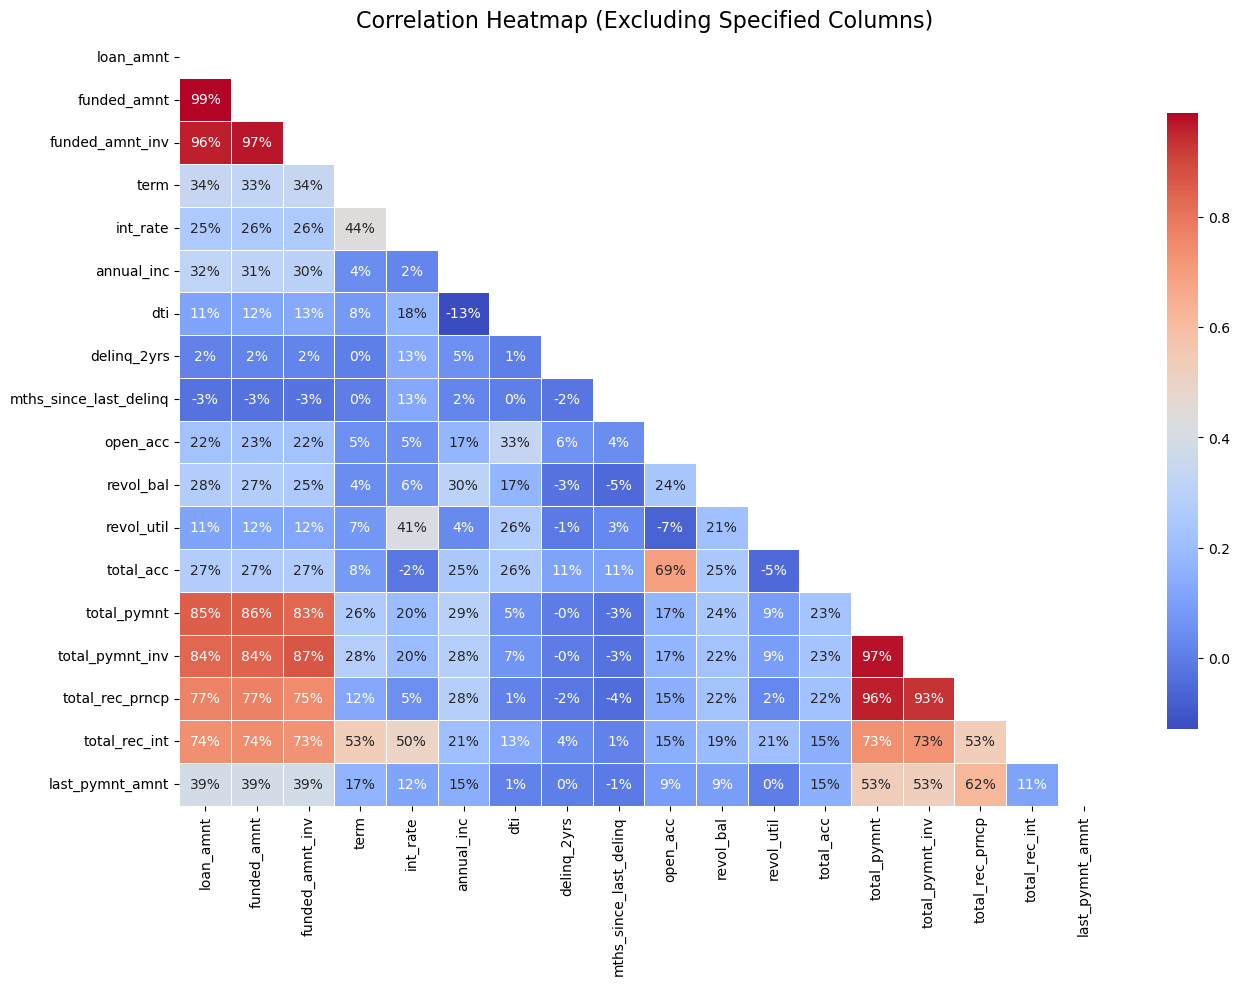

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exclude_cols = ["id", "emp_length_int", "mths_since_last_record", "recoveries", "total_rev_hi_lim"]
filtered_df = loan_data.drop(columns=exclude_cols, errors='ignore')

numeric_df = filtered_df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

formatted_annot = corr.copy()
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        formatted_annot.iloc[i, j] = f"{corr.iloc[i, j]:.0%}"

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=formatted_annot,
    fmt='',
    cmap='coolwarm',
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap (Excluding Specified Columns)', fontsize=16)
plt.show()
#as percentage of specific variables